In [1]:
from time import time
import matplotlib.pyplot as plt
import tensorflow as tf


In [2]:
mnist = tf.keras.datasets.fashion_mnist
(X_train,y_train),(X_test,y_test) = mnist.load_data()

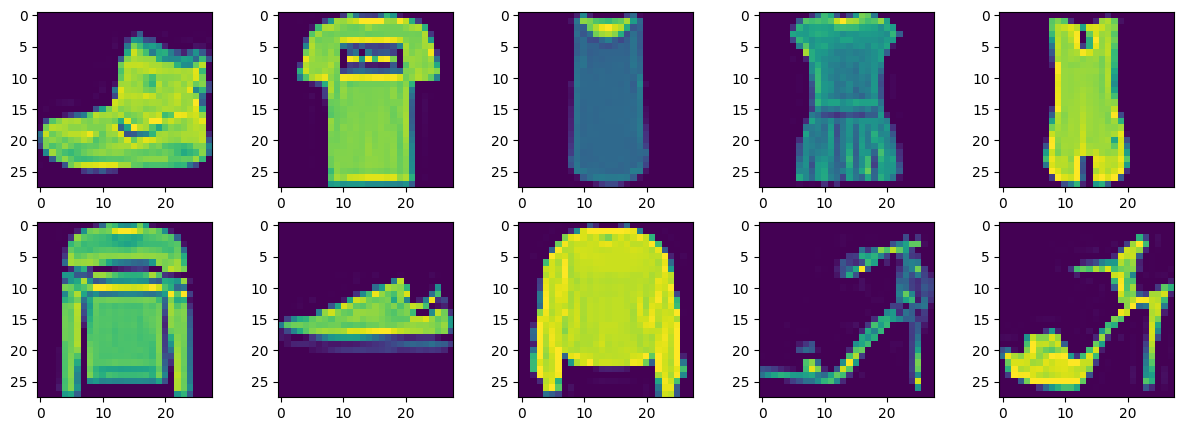

In [3]:
fig,axis = plt.subplots(nrows = 2,ncols = 5 , figsize = (15,5))
ax = axis.ravel()

for i in range(10):
    ax[i].imshow(X_train[i].reshape((28,28)))
plt.show()

In [4]:
training_images = X_train/255.0
test_images = X_test/255.0


In [5]:
# Keras Model Oluşturalım...

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256,activation = tf.nn.relu),
    tf.keras.layers.Dense(10,activation = tf.nn.softmax)
])

# Model Oluşturmanın diğer Türü

# from keras.models import Sequential
# from keras.layers import Dense,Flatten

# model = Sequential()
# model.add(Flatten())
# model.add(Dense(256,activation = "relu"))
# model.add(Dense(10,activation="softmax"))





In [6]:
model.compile(loss = "sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])


In [7]:
t1 = time()
model.fit(training_images,y_train,epochs=10)
t2 = time()

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4868 - accuracy: 0.8260
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3675 - accuracy: 0.8655
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3283 - accuracy: 0.8795
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3023 - accuracy: 0.8889
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2838 - accuracy: 0.8946
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2705 - accuracy: 0.8998
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2568 - accuracy: 0.9037
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2449 - accuracy: 0.9089
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2362 - accuracy: 0.9114
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.225

In [8]:
print("\nEğitimin Tamamlanma Saati:{} seconds\n".format(round(t2-t1,3)))


Eğitimin Tamamlanma Saati:39.309 seconds



In [9]:
test_loss = model.evaluate(test_images,y_test)
print("\nTest Accuracy: ",test_loss[1])

313/313 [==============================] - 0s 935us/step - loss: 0.3498 - accuracy: 0.8731

Test Accuracy:  0.8730999827384949


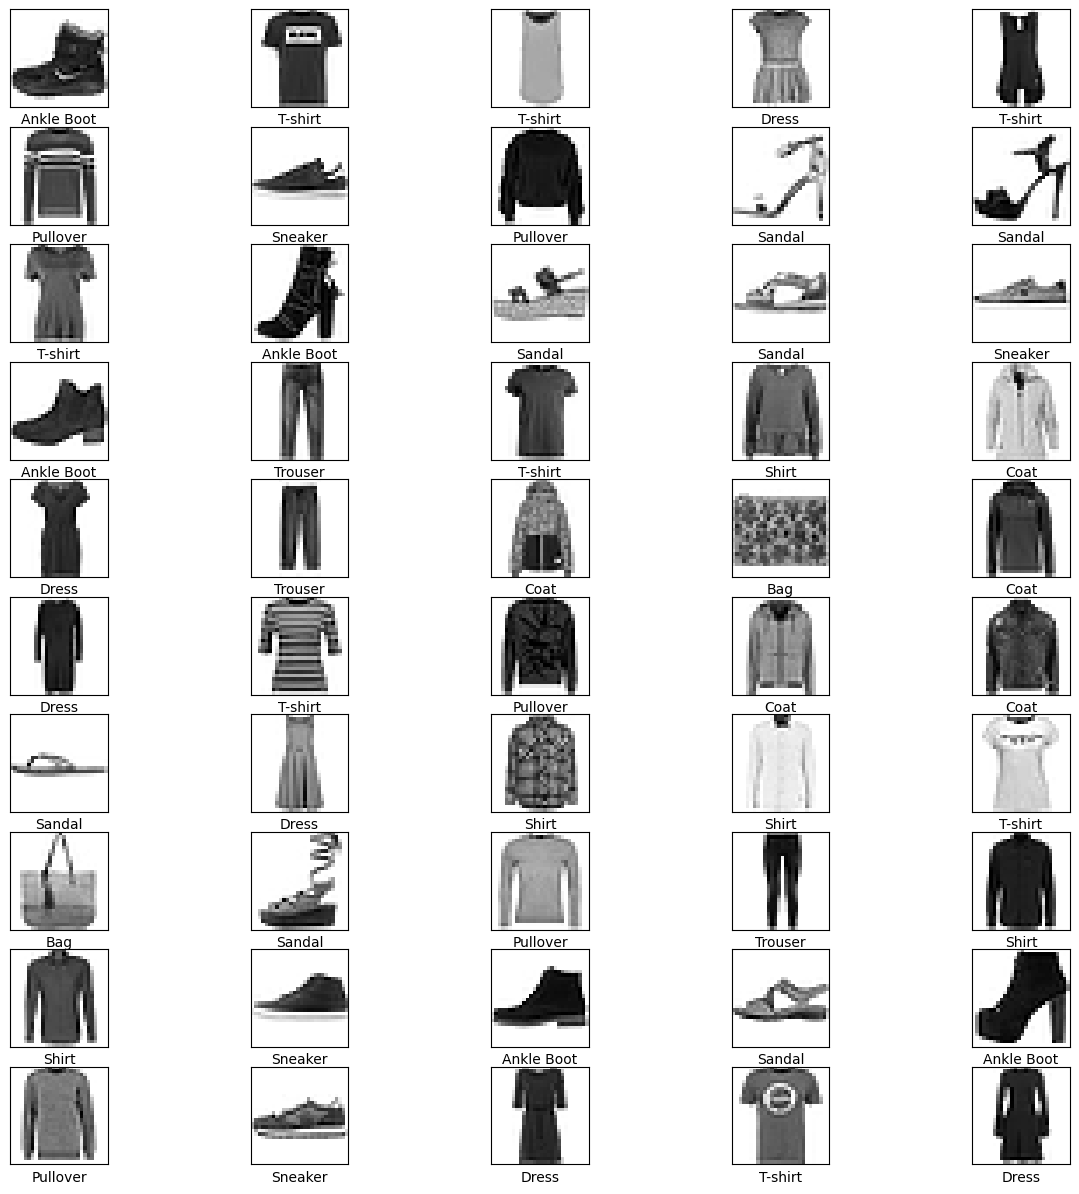



[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [10]:
# MODELE CONVOLUTİON VE POOLİNG LAYERS EKLEYELİM FARKI GÖRELİM!!

(X_train,y_train),(X_test,y_test) = mnist.load_data()
X_train = X_train.reshape(60000,28,28,1)
X_train = X_train / 255.0

X_test = X_test.reshape(10000,28,28,1)
X_test = X_test / 255.0

class_names = ["T-shirt","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle Boot"]

plt.figure(figsize=(15,15))
for i in range(50):
    plt.subplot(10,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid = False
    plt.imshow(X_train[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])

plt.show()

print("\n")


from keras.utils.np_utils import to_categorical as tc
y_train_ct = tc(y_train,10)
y_test_ct = tc(y_test,10)

for i in range(10):
    print(y_train_ct[i])

print("\n")

for i in range(10):
    print(y_test_ct[i])  

In [11]:
from keras.models import Sequential
from keras.layers import Dense,MaxPooling2D,Conv2D,Flatten,Dropout , BatchNormalization

#tf.keras.layers.Conv2D()

model2 = Sequential()
model2.add(Conv2D(filters=64,kernel_size = (4,4),activation = "relu",input_shape = (28,28,1)))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
model2.add(Conv2D(filters=64 , kernel_size=(4,4),activation="relu"))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
model2.add(Flatten())
model2.add(Dense(128,activation="relu"))
model2.add(Dense(10,activation="softmax"))

In [12]:
model2.compile(loss = "categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 64)        1088      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 12, 12, 64)       256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 64)          65600     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)        

In [24]:
t1 = time()
history = model2.fit(X_train , y_train_ct ,epochs=3)
t2 = time()

Epoch 1/3
1875/1875 [==============================] - 55s 30ms/step - loss: 0.0921 - accuracy: 0.9650
Epoch 2/3
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0806 - accuracy: 0.9695
Epoch 3/3
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0747 - accuracy: 0.9715


In [14]:
print("\nEğitimi Tamamlama Süresi: {:.2f} dakika".format((t2 - t1) / 60))



Eğitimi Tamamlama Süresi: 8.94 dakika


In [25]:
test_loss = model.evaluate(test_images,y_test)
print("Test-Loss",test_loss)

313/313 [==============================] - 0s 1ms/step - loss: 0.3498 - accuracy: 0.8731
Test-Loss [0.3497624397277832, 0.8730999827384949]


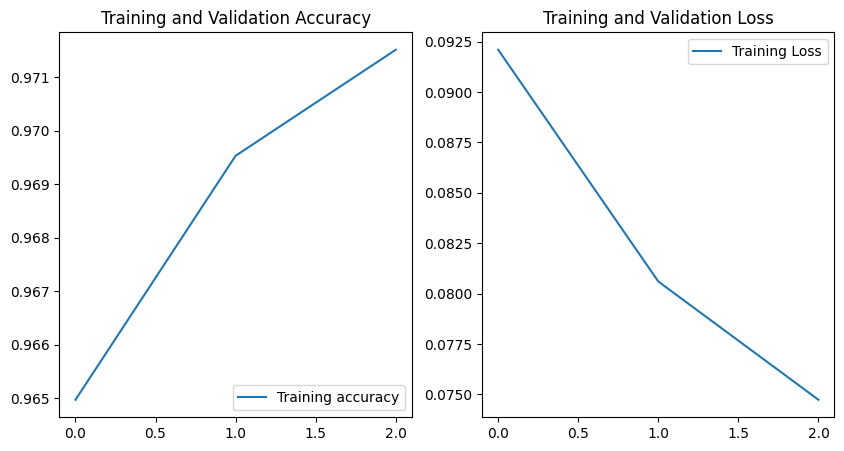

In [28]:
train_acc = history.history["accuracy"]

train_loss = history.history["loss"]


epochs_range = range(3)

plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.plot(epochs_range,train_acc,label = "Training accuracy")

plt.legend(loc = "lower right")
plt.title("Training and Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(epochs_range,train_loss,label = "Training Loss")

plt.legend(loc = "upper right")
plt.title("Training and Validation Loss")
plt.show()



313/313 [==============================] - 2s 6ms/step


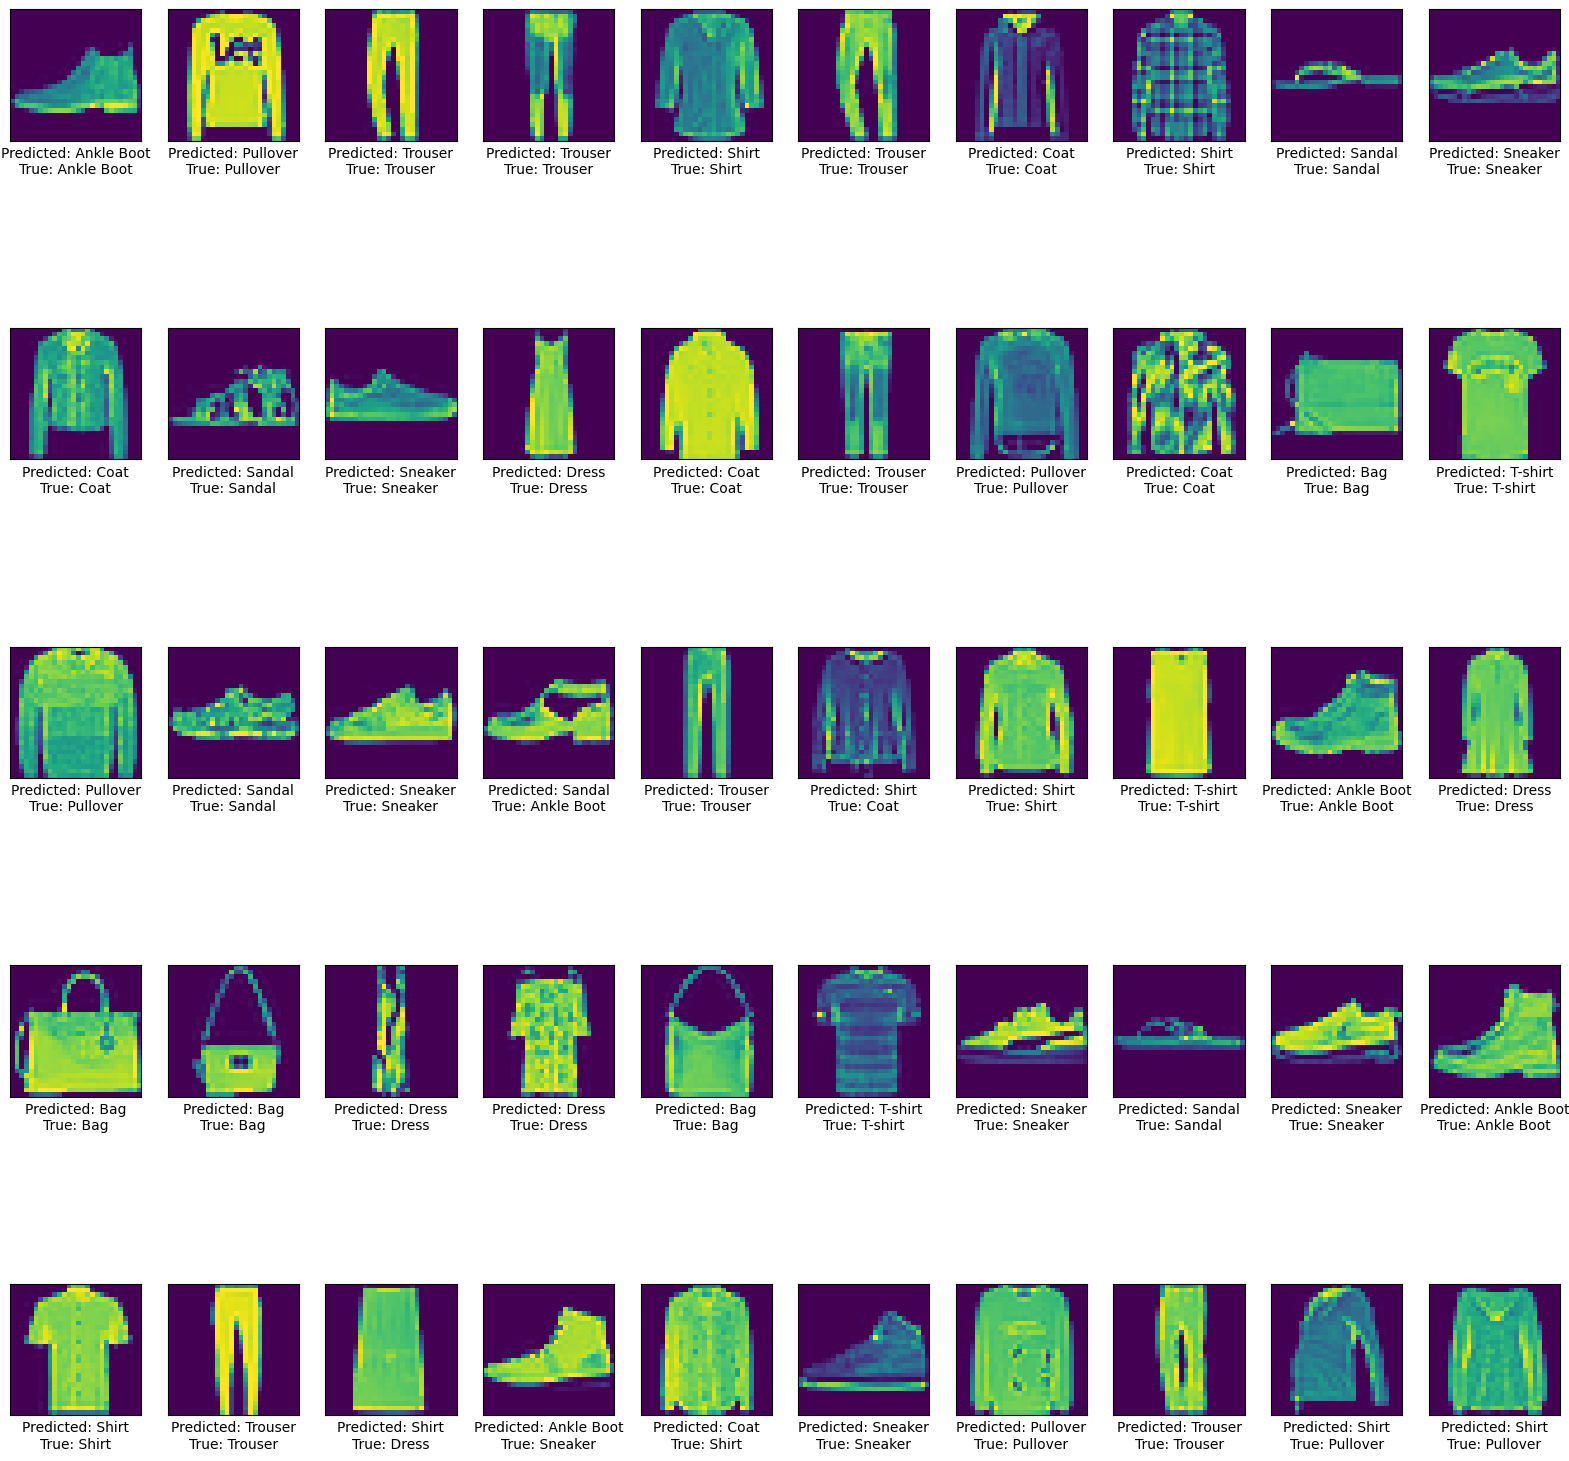

In [15]:
import numpy as np 
predictions = model2.predict(X_test)
predicted_labels = [class_names[p.argmax()] for p in predictions]
true_labels = [class_names[t] for t in y_test]

# Tahminleri ve gerçek etiketleri karşılaştırın
plt.figure(figsize=(20, 20))
for i in range(50):
    plt.subplot(5, 10, i + 1)
    plt.imshow(X_test[i].reshape(28,28))
    # Aşağıdaki kod satırı görüntüyü siyah beyaz yapar.
    # plt.imshow(X_test[i].reshape(28, 28),cmap = plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    plt.grid = False
    plt.xlabel(f'Predicted: {predicted_labels[i]}\nTrue: {true_labels[i]}')
plt.show()

In [16]:
tahmin = model2.predict(X_test)



for i in range(10):
    predicted = np.argmax(tahmin[i])
    true_class = y_test[i]
    print("Prediction_class:",predicted)
    print("Y-test Class:",true_class)



313/313 [==============================] - 2s 6ms/step
Prediction_class: 9
Y-test Class: 9
Prediction_class: 2
Y-test Class: 2
Prediction_class: 1
Y-test Class: 1
Prediction_class: 1
Y-test Class: 1
Prediction_class: 6
Y-test Class: 6
Prediction_class: 1
Y-test Class: 1
Prediction_class: 4
Y-test Class: 4
Prediction_class: 6
Y-test Class: 6
Prediction_class: 5
Y-test Class: 5
Prediction_class: 7
Y-test Class: 7
